# Actividad en clase


In [ ]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt


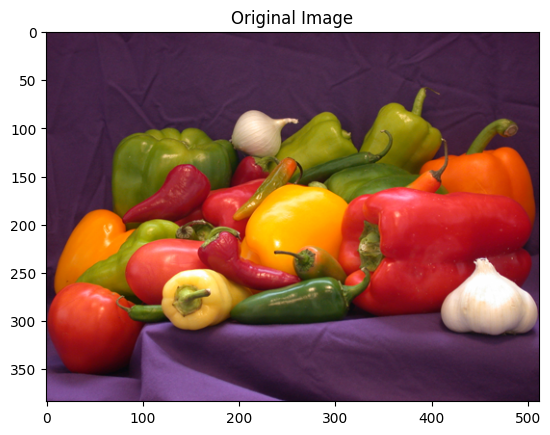

In [12]:
im_bgr = cv2.imread('./images/peppers.png')
im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)


def show_image(image, title='Image', axis='off', cmap=None):
  plt.imshow(image, cmap=cmap)
  plt.title(title)
  plt.axis(axis)
  plt.show()



show_image(im_rgb, 'Original Image', 'on')






Desarrolle un algoritmo de visión por computadora que identifique y separe objetos en una imagen según su color.

Entrada:

Una imagen en formato RGB.
Salida:

Una imagen indexada, donde cada píxel recibe una etiqueta según su color:

- 1 para los objetos blancos.
- 2 para los objetos rojos. 
- 0 para el fondo.



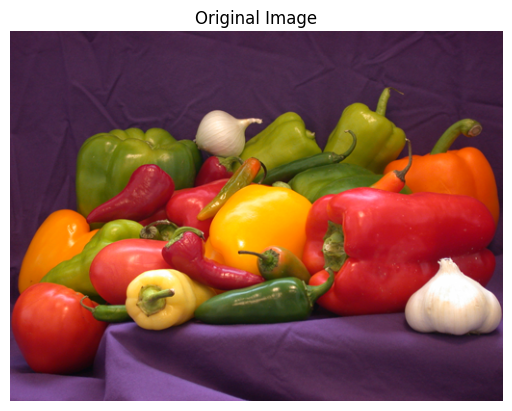

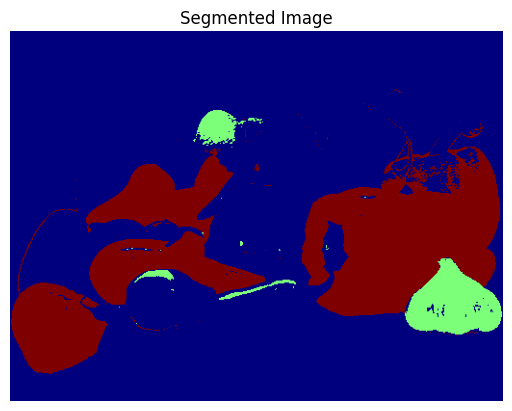

True

In [31]:


def segment_image(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Imagen no encontrada o no se puede cargar.")

    # Convertir de BGR a HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Adjusted range for detecting white objects (reducing shadow effects)
    lower_white = np.array([0, 0, 100])   # Lower V to include shaded white areas
    upper_white = np.array([180, 80, 255])  # Increased S to include slightly saturated whites
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Adjusted range for detecting red objects
    lower_red1 = np.array([0, 100, 50])   # Lower S and V to include darker reds
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 100, 50])
    upper_red2 = np.array([180, 255, 255])

    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = mask_red1 | mask_red2  # Combinar ambas máscaras

    # Crear la imagen indexada (0 = fondo, 1 = blanco, 2 = rojo)
    indexed_image = np.zeros_like(mask_white, dtype=np.uint8)
    indexed_image[mask_white > 0] = 1  # Etiquetar objetos blancos como 1
    indexed_image[mask_red > 0] = 2    # Etiquetar objetos rojos como 2

    return indexed_image

# Ejemplo de uso
image_path = './images/peppers.png' # Cambia esto por la ruta de tu imagen
segmented = segment_image(image_path)


show_image(im_rgb, 'Original Image')
show_image(segmented, 'Segmented Image', cmap='jet')

cv2.imwrite('seg.png', segmented * 127)  # Guardar la imagen segmentada